# Linear Regression using the normal equation

## importing needed libraries

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## importing data

In [14]:
diabetes = datasets.load_diabetes() 

In [15]:
X = diabetes.data

In [16]:
y = diabetes.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing data

In [18]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [19]:
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)

## implementing linear regression model


In [20]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.theta = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) 
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1) 
        return X @ self.theta

## initializing our model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

## testing our model

In [25]:
y_pred_model = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_model)
print("Mean Squared Error:", mse)

Mean Squared Error: 3109.1639443985764


## plotting

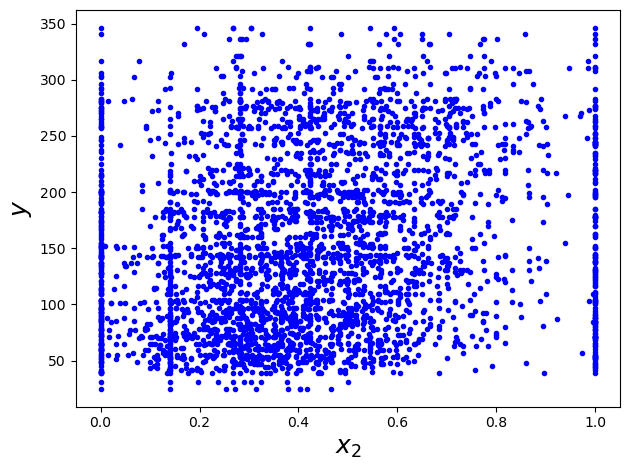

In [27]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tight_layout()
plt.show()

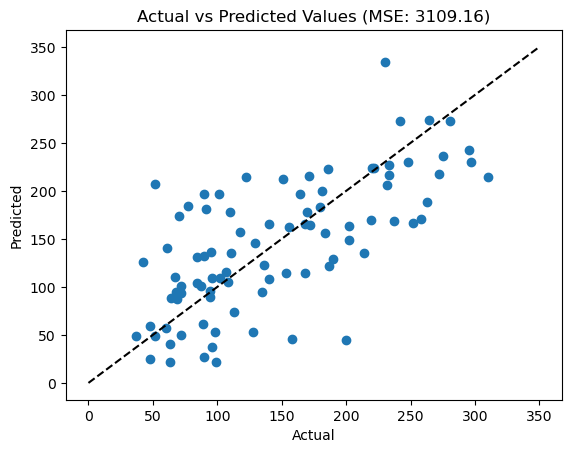

In [29]:
plt.scatter(y_test, y_pred_model)
plt.plot([0, 350], [0, 350], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (MSE: {:.2f})'.format(mse))
plt.show()